# Exercise 1: Prime Testing

CSCI208: Analysis and Design of Algorithms<br>
Nile University<br>
Ammar Sherif<br>
Module 01

## Problem Statement

We want to develop an algorithm that tests whether a number is prime or not
**Input:**
$$\boxed{n \in \mathbb{Z}\qquad n \geq 2}$$

## Algorithm Implementation

In [317]:
import math

# in this section we are going to use 2 function first one is recursive and second is loop function

In [422]:
# this is the recursive function
# In case, you can optimize it more
def check(n, x = 2):
    if n <=1:
        return False
    if x > math.ceil(n/2):
        return True
    if (n/x) % 2 == 1.0 or (n/x) % 2 == 0.0:
        return False
    else:
        x += 1
        return check(n, x)

In [423]:
# this is the loop function
def isPrime(n):
    if n <=1:
        return False
    ident = True
    if n > 3:
        for i in range(2,math.ceil(n/2)+1):
            if (n/i)%2 == 0.0 or (n/i)%2 == 1.0:
                ident = False
                break
        return ident
    else:
        return ident
        

## Trying the Algorithm

In [397]:
# use some inputs to empirically test your algorithm
print(isPrime(11))

True


## Growth Curve

Empirically, using **time measurements**, test your algorithm and **plot a graph** that shows its growth rate when variating the input. Notice, we are interested in the **worst-case** time.<br>

**QUESTION** Which inputs will lead to the wors-case time according to your implementation?

**ANSWER** the inputs that will lead to the worst case time are prime numbers as shown in the figures in this notebook

**QUESTION** What is the problem size here?

**Answer** I found out that more the numbers increase the more the time complexity increase I have increased the numbers to reach 5001 to avoid stack overflow in recursion and this is stated in the following graphs. this question is answered in depth in the following cells

In [398]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time

In [399]:
times= []

In [400]:
times = []
for n in range(500):
    start_time = time.time()
    check(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times.append(execution_time_ns)

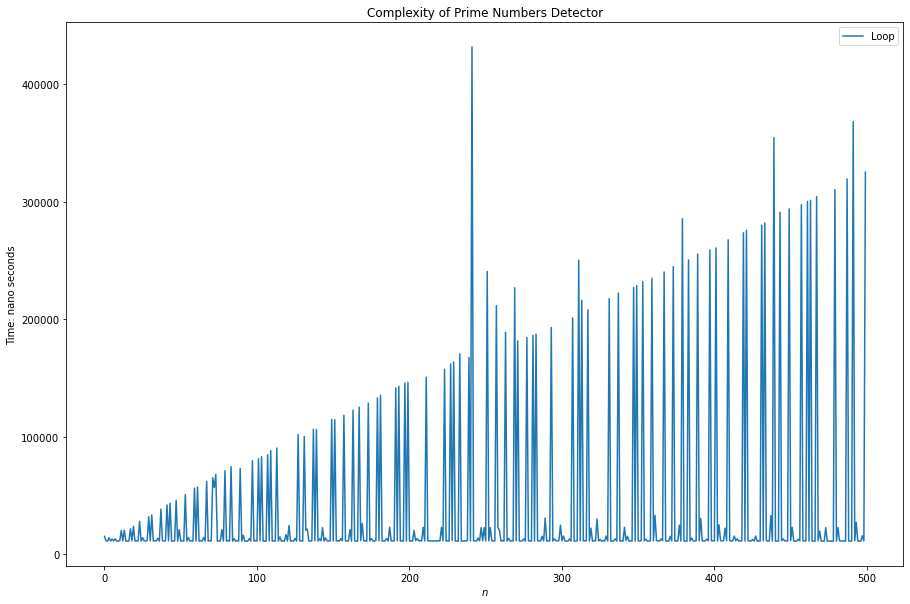

In [401]:
f,ax = plt.subplots(figsize=(15, 10))
ax.plot(range(500),times,label='recursion')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

# this is not a curve thus we can't rely on the number of inputs so we will use the biggest number of inputs recursion can withstand to avoid stack overflow and to avoid maximum recursion depth error (which occur at around 5000 inputs and this number of inputs is enough)

In [402]:
times = []
for n in range(5001):
    start_time = time.time()
    check(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times.append(execution_time_ns)

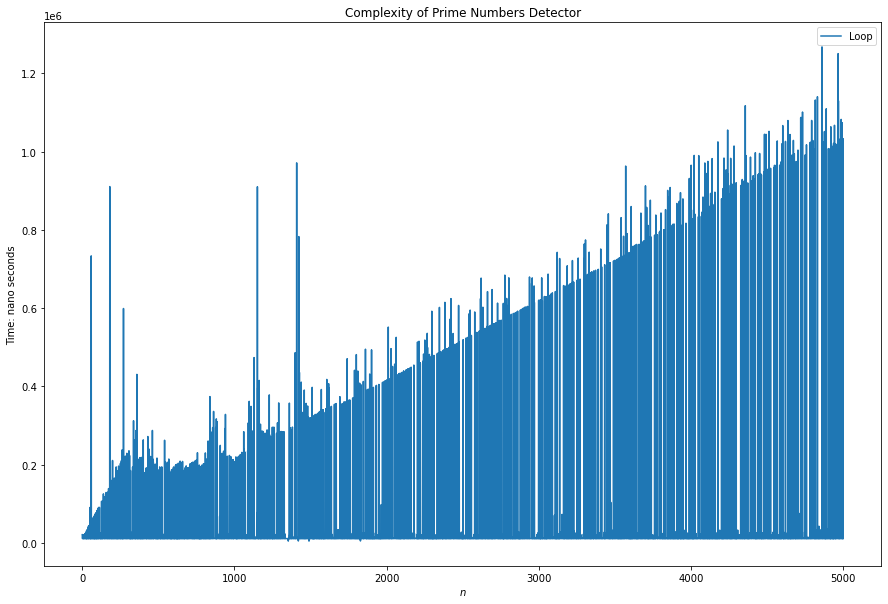

In [403]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(5001),times,label='recursion')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

# however this kind of graph is not convenient nor representative for the data so we can plot a histogram by dividing the values that we have by the mean of each 1000 value

In [404]:
x1 = times[0: 1001]
x2 = times[1001: 2001]
x3 = times[2001: 3001]
x4 = times[3001: 4001]
x5 = times[4001: 5001]
lis1 = [sum(x1) / len(x1),sum(x2) / len(x2),sum(x3) / len(x3),sum(x4) / len(x4),sum(x5) / len(x5)]
lis1

[42915.58241867995,
 58415.41290283203,
 79098.70147705078,
 101032.49549865723,
 127917.28973388672]

In [405]:
lis2 = [1,2,3,4,5]

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'mean of collection of time')

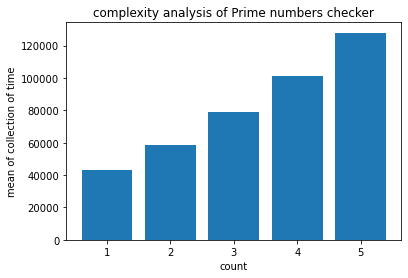

In [407]:
plt.bar(lis2, lis1)
plt.title('recursion complexity analysis of Prime numbers checker')
plt.xlabel('count')
plt.ylabel('mean of each collection of time analysis')


## here I used Gaussian distribution function to fit the curve in the histogram

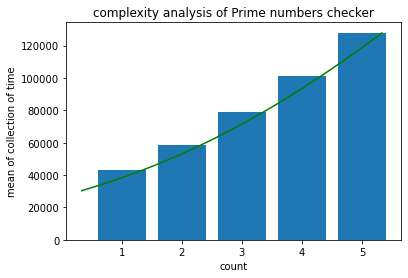

In [408]:
from scipy.optimize import curve_fit

plt.bar(lis2, lis1)
plt.title('recursion complexity analysis of Prime numbers checker')
plt.xlabel('count')
plt.ylabel('mean of each collection of time analysis')
def func(x, a, b, c):
    # a Gaussian distribution
    return a * np.exp(-(x-b)**2/(2*c**2))
width = 1/1.5


popt, pcov = curve_fit(func, lis2, lis1)
x = np.linspace(0, 5, 100)
y = func(x, *popt)

plt.plot(x + width/2, y, c='g')

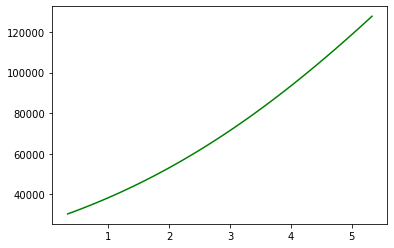

In [409]:
plt.plot(x + width/2, y, c='g')

# we can consider this to be our complexity analysis using recursion

# now we will just do the same thing with the loop function

In [410]:
times = []
for n in range(5001):
    start_time = time.time()
    isPrime(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times.append(execution_time_ns)

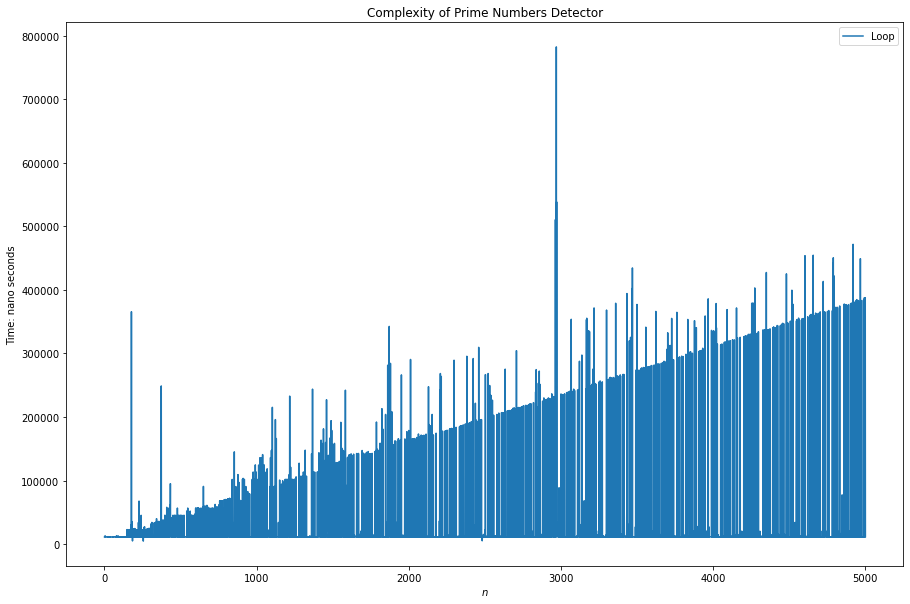

In [411]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(5001),times,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

In [412]:
x1 = times[0: 1001]
x2 = times[1001: 2001]
x3 = times[2001: 3001]
x4 = times[3001: 4001]
x5 = times[4001: 5001]
lis1 = [sum(x1) / len(x1),sum(x2) / len(x2),sum(x3) / len(x3),sum(x4) / len(x4),sum(x5) / len(x5)]
lis1

[18180.786193786684,
 31063.79508972168,
 38666.96357727051,
 45779.46662902832,
 53291.32080078125]

Text(0, 0.5, 'mean of collection of time')

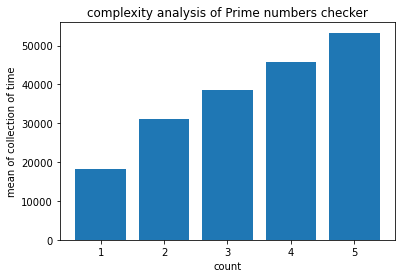

In [413]:
plt.bar(lis2, lis1)
plt.title('loop complexity analysis of Prime numbers checker')
plt.xlabel('count')
plt.ylabel('mean of each collection of time analysis')

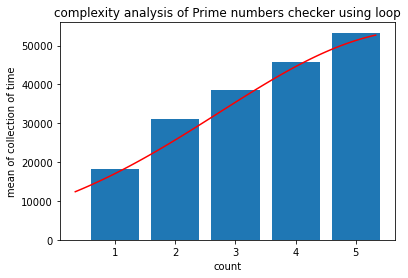

In [414]:
from scipy.optimize import curve_fit

plt.bar(lis2, lis1)
plt.title('loop complexity analysis of Prime numbers checker using loop')
plt.xlabel('count')
plt.ylabel('mean of each collection of time analysis')
def func(x, a, b, c):
    # a Gaussian distribution
    return a * np.exp(-(x-b)**2/(2*c**2))
width2 = 1/1.5


popt, pcov = curve_fit(func, lis2, lis1)
x2 = np.linspace(0, 5, 100)
y2 = func(x, *popt)

plt.plot(x2 + width2/2, y2, c='r')

# and now plotting both together we can find out which function is better

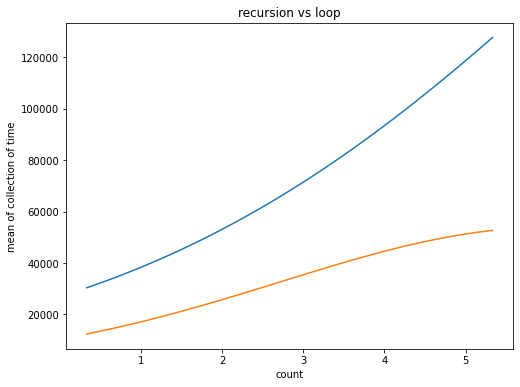

In [415]:
f,ax = plt.subplots(figsize=(8, 6))
ax.plot(x + width/2, y,label='recursive')
ax.plot(x2 + width2/2, y2,label = 'loop')
ax.set_title('recursion vs loop')
ax.set_xlabel('count')
ax.set_ylabel('mean of collection of time')
plt.show()

# we can see that the function with the loop is better than the function with the recursion

## there is another way we can do this. first off, we have a function that specifies whether the number is prime or not so we can then add non-prime numbers to the begining of the list and the prime numbers to the end of the list so that we can find a whether the prime numbers are the worst cases for our functions

In [416]:
pnplist = []
for i in range(10000):
    if not isPrime(i):
        pnplist.append(i)

In [417]:
for i in range(10000):
    if isPrime(i):
        pnplist.append(i)

In [418]:
len(pnplist)

10000

In [419]:
timesn = []
for n in range(10000):
    start_time = time.time()
    isPrime(pnplist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timesn.append(execution_time_ns)

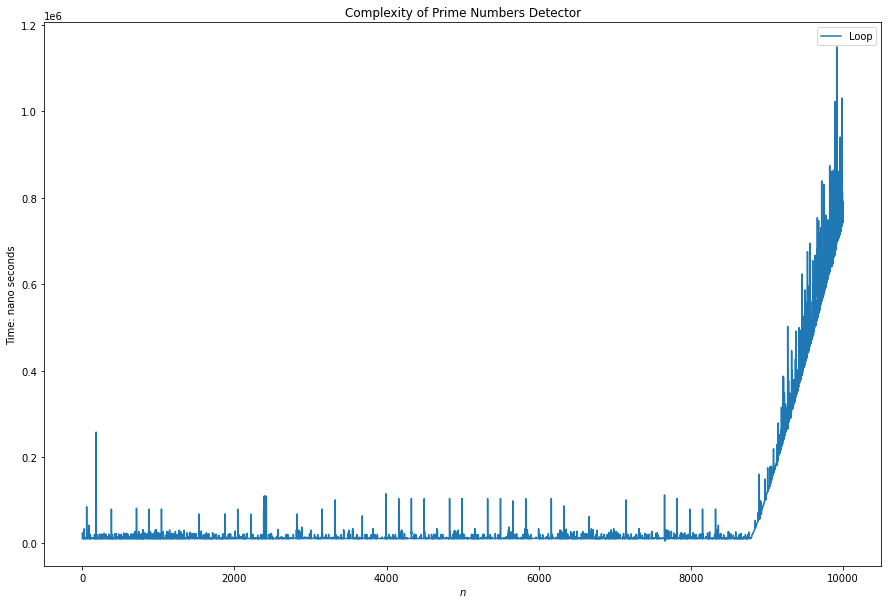

In [369]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(10000),timesn,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

## this sudden rise of time in this graph shows that prime numbers are indeed the worst cases 

In [431]:
timesn2 = []
for n in range(9500):
    start_time = time.time()
    check(pnplist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timesn2.append(execution_time_ns)

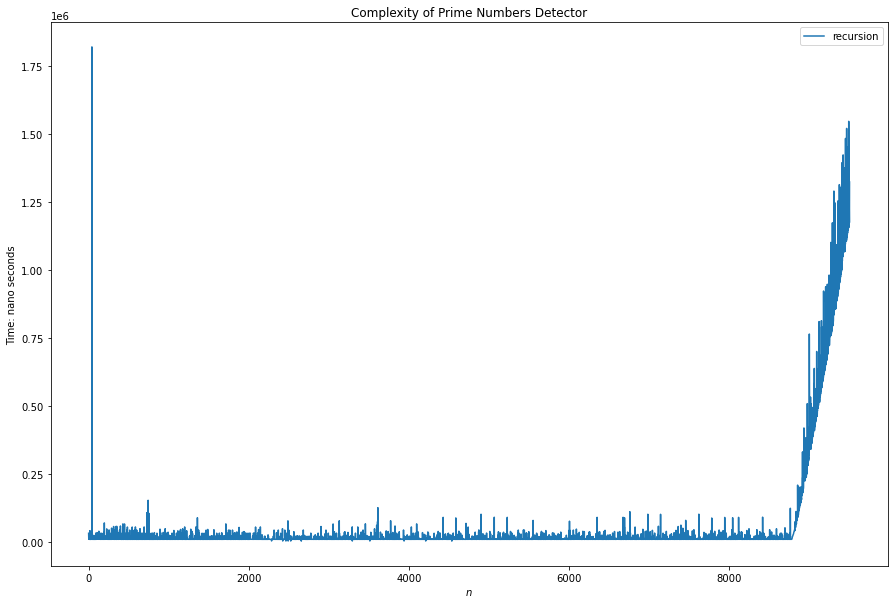

In [432]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(9500),timesn2,label='recursion')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

## we can then find out which algorithm is better by only feeding prime numbers to the functions

In [424]:
primelist = []
for i in range(10000):
    if isPrime(i):
        primelist.append(i)

In [426]:
len(primelist)

1229

In [438]:
timeswcr = [] # wc short for worst case recursion
for n in range(700):
    start_time = time.time()
    check(primelist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timeswcr.append(execution_time_ns)

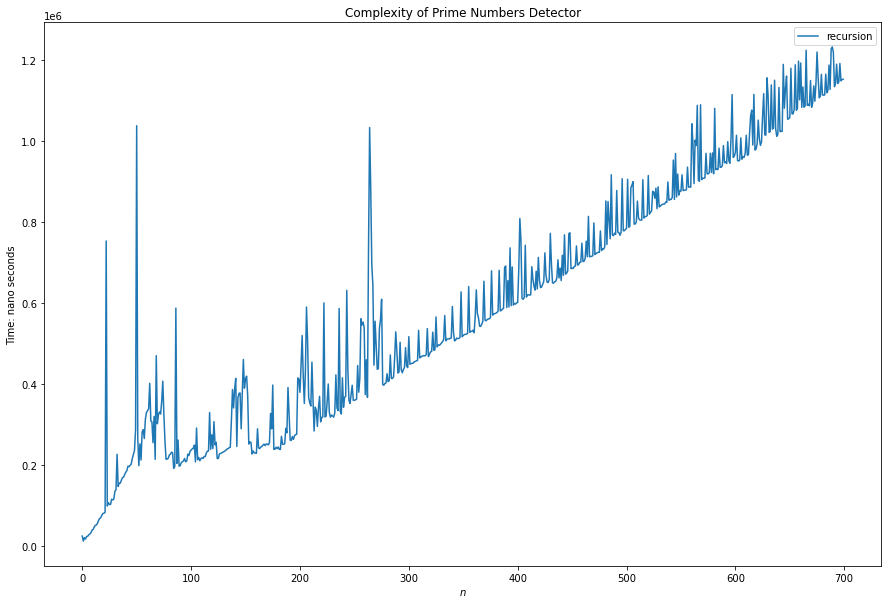

In [442]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcr,label='recursion')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

In [440]:
timeswcl = [] # wc short for worst case recursion
for n in range(700):
    start_time = time.time()
    isPrime(primelist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timeswcl.append(execution_time_ns)

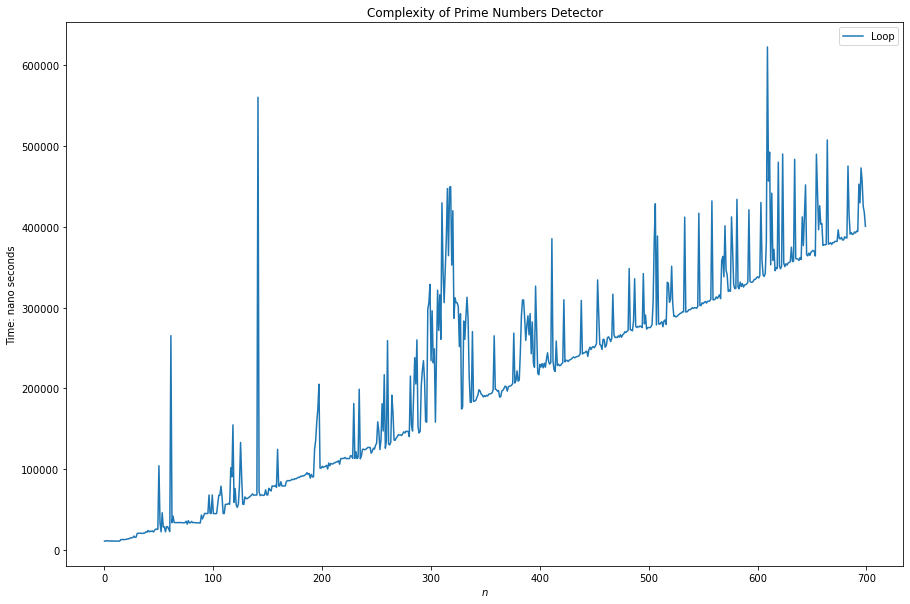

In [443]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcl,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

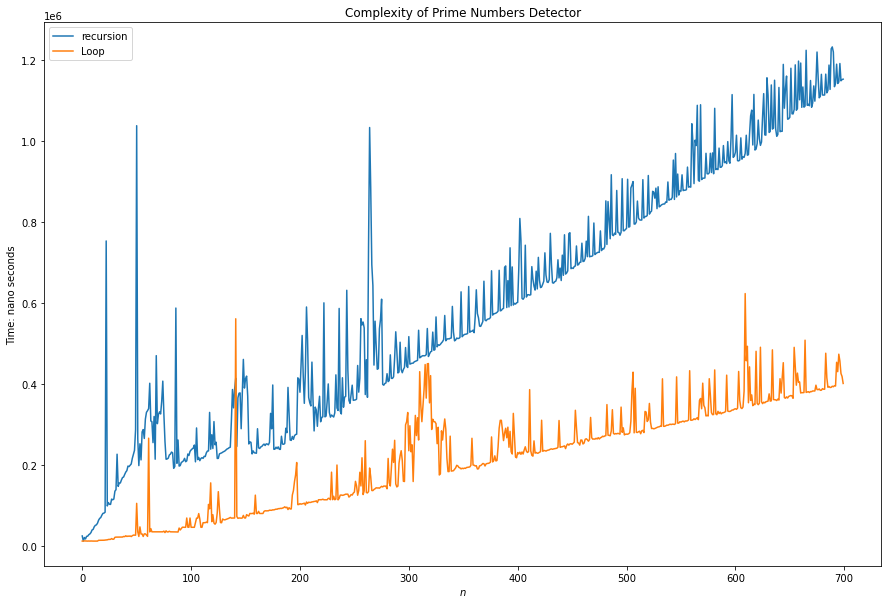

In [444]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcr,label='recursion')
ax.plot(range(700),timeswcl,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

# it is clear now that using loops is better than the recursion regarding prime numbers what about the average case

In [445]:
nonprimelist = []
for i in range(10000):
    if not isPrime(i):
        nonprimelist.append(i)

In [446]:
nonprimelist

[0,
 1,
 4,
 6,
 8,
 9,
 10,
 12,
 14,
 15,
 16,
 18,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 42,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 60,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 72,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 102,
 104,
 105,
 106,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 138,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 194,
 195,
 196,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 224,
 225,
 226,
 228,
 

In [449]:
timeswcr = [] # wc short for worst case recursion
for n in range(700):
    start_time = time.time()
    check(primelist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timeswcr.append(execution_time_ns)

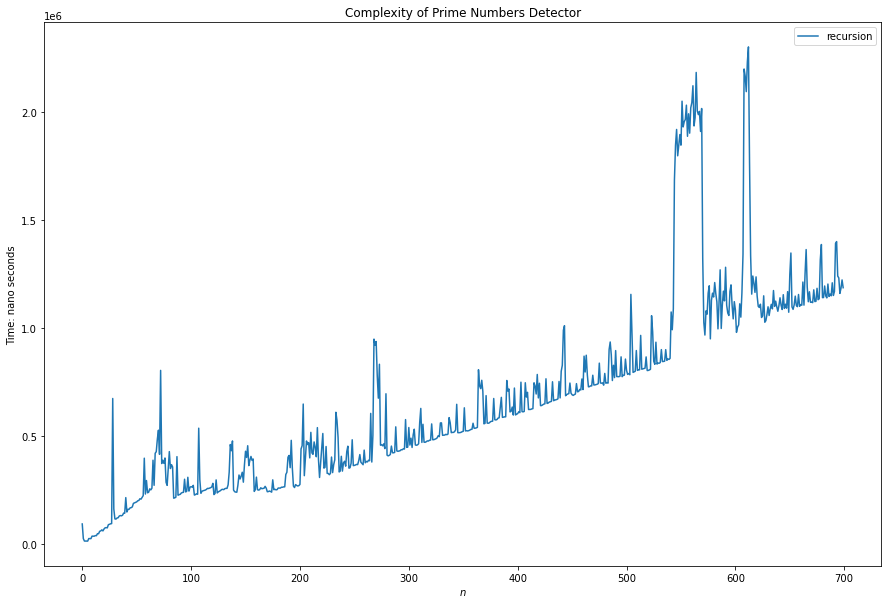

In [450]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcr,label='recursion')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

In [451]:
timeswcl = [] # wc short for worst case recursion
for n in range(700):
    start_time = time.time()
    isPrime(primelist[n])
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    timeswcl.append(execution_time_ns)

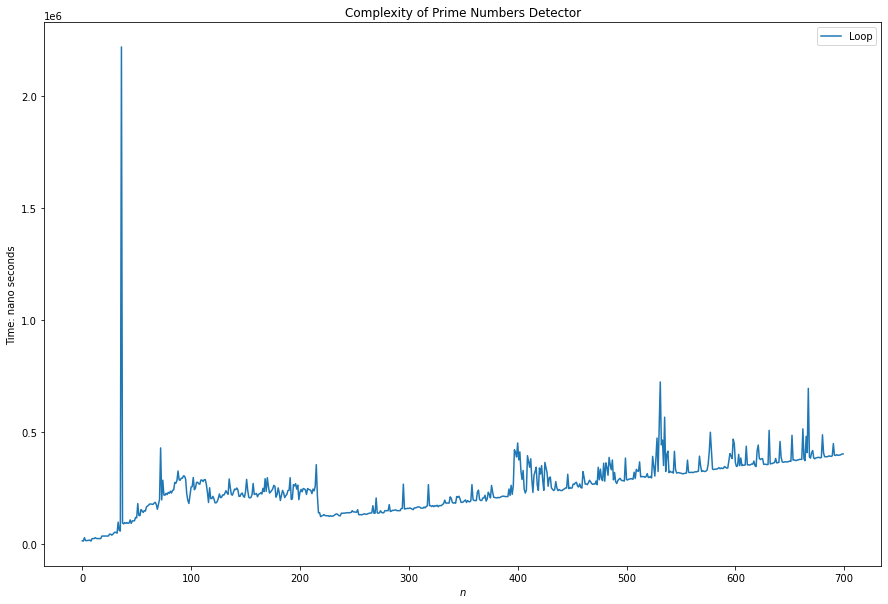

In [452]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcl,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

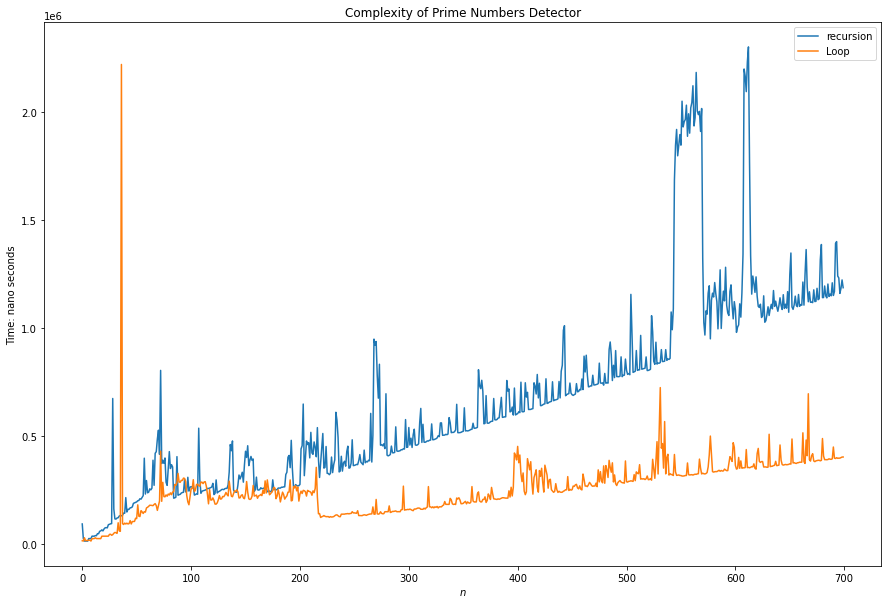

In [453]:
f,ax = plt.subplots(figsize=(15,10))
ax.plot(range(700),timeswcr,label='recursion')
ax.plot(range(700),timeswcl,label='Loop')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Prime Numbers Detector')
ax.legend(loc=0);

## so here we can see that loops function is better in the average case